In [1]:
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Import Lazy predict function and parameters
import lazypredict
from lazypredict.Supervised import LazyClassifier

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
)
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Calculate Variance Inflation Factor (VIF) for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor


# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
#Loading of the Dataset
file_path = r"C:\Users\HP\Downloads\workforce-management-optimization\dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)

Data Overview
Observations
Sanity checks
- Observing the first 10 rows of the dataset

In [3]:
df.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   
5                        4    Male          79               3         1   
6                        3  Female          81               4         1   
7                        4    Male          67               3         1   
8                        4    Male          44               2         3   
9                        3    Male          94               3         2   

                     JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0            Sales Executive                4        Single           5993   
1         Research Scientist                2       Married           5130   
2      Laboratory Technician                3        Single           2090   
3         Research Scientist                3       Married           2909   
4      Laboratory Technician                2       Married           3468   
5      Laboratory Technician                4        Single           3068   
6      Laboratory Technician                1       Married           2670   
7      Laboratory Technician                3      Divorced           2693   
8     Manufacturing Director                3        Single           9526   
9  Healthcare Representative                3       Married           5237   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   
5        11864                   0      Y       No                 13   
6         9964                   4      Y      Yes                 20   
7        13335             

In [4]:
#View the shape of the data
df.shape

(1470, 35)

The data has 1470 rows and 35 columns

In [5]:
#View datatypes of the columns and other features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1. The dataset has got 'Object' and 'int' data types
2. The data doesnt have missing values

In [6]:
#View data summary for object type only
df.describe(include='object').T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [7]:
#We view the unique entries on the object data columns
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department
['Sales' 'Research & Development' 'Human Resources']
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender
['Female' 'Male']
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus
['Single' 'Married' 'Divorced']
Over18
['Y']
OverTime
['Yes' 'No']


In [8]:
#get uique values in the StandardHours column
df['StandardHours'].unique()

array([80])

In [9]:
#get unique value on the employee count column
df['EmployeeCount'].unique()

array([1])

In [10]:
#get unique values in the performancerating column
df["PerformanceRating"].unique()

array([3, 4])

In [11]:
#We view the statistical summary of int data columns
df.describe().T

count      mean      std      min      25%  \
Age                      1470.000    36.924    9.135   18.000   30.000   
DailyRate                1470.000   802.486  403.509  102.000  465.000   
DistanceFromHome         1470.000     9.193    8.107    1.000    2.000   
Education                1470.000     2.913    1.024    1.000    2.000   
EmployeeCount            1470.000     1.000    0.000    1.000    1.000   
EmployeeNumber           1470.000  1024.865  602.024    1.000  491.250   
EnvironmentSatisfaction  1470.000     2.722    1.093    1.000    2.000   
HourlyRate               1470.000    65.891   20.329   30.000   48.000   
JobInvolvement           1470.000     2.730    0.712    1.000    2.000   
JobLevel                 1470.000     2.064    1.107    1.000    1.000   
JobSatisfaction          1470.000     2.729    1.103    1.000    2.000   
MonthlyIncome            1470.000  6502.931 4707.957 1009.000 2911.000   
MonthlyRate              1470.000 14313.103 7117.786 2094.000 8047.000   
NumCompaniesWorked       1470.000     2.693    2.498    0.000    1.000   
PercentSalaryHike        1470.000    15.210    3.660   11.000   12.000   
PerformanceRating        1470.000     3.154    0.361    3.000    3.000   
RelationshipSatisfaction 1470.000     2.712    1.081    1.000    2.000   
StandardHours            1470.000    80.000    0.000   80.000   80.000   
StockOptionLevel         1470.000     0.794    0.852    0.000    0.000   
TotalWorkingYears        1470.000    11.280    7.781    0.000    6.000   
TrainingTimesLastYear    1470.000     2.799    1.289    0.000    2.000   
WorkLifeBalance          1470.000     2.761    0.706    1.000    2.000   
YearsAtCompany           1470.000     7.008    6.127    0.000    3.000   
YearsInCurrentRole       1470.000     4.229    3.623    0.000    2.000   
YearsSinceLastPromotion  1470.000     2.188    3.222    0.000    0.000   
YearsWithCurrManager     1470.000     4.123    3.568    0.000    2.000   

                               50%       75%       max  
Age                         36.000    43.000    60.000  
DailyRate                  802.000  1157.000  1499.000  
DistanceFromHome             7.000    14.000    29.000  
Education                    3.000     4.000     5.000  
EmployeeCount                1.000     1.000     1.000  
EmployeeNumber            1020.500  1555.750  2068.000  
EnvironmentSatisfaction      3.000     4.000     4.000  
HourlyRate                  66.000    83.750   100.000  
JobInvolvement               3.000     3.000     4.000  
JobLevel                     2.000     3.000     5.000  
JobSatisfaction              3.000     4.000     4.000  
MonthlyIncome             4919.000  8379.000 19999.000  
MonthlyRate              14235.500 20461.500 26999.000  
NumCompaniesWorked           2.000     4.000     9.000  
PercentSalaryHike           14.000    18.000    25.000  
PerformanceRating            3.000     3.000     4.000  
RelationshipSatisfaction     3.000     4.000     4.000  
StandardHours               80.000    80.000    80.000  
StockOptionLevel             1.000     1.000     3.000  
TotalWorkingYears           10.000    15.000    40.000  
TrainingTimesLastYear        3.000     3.000     6.000  
WorkLifeBalance              3.000     3.000     4.000  
YearsAtCompany               5.000     9.000    40.000  
YearsInCurrentRole           3.000     7.000    18.000  
YearsSinceLastPromotion      1.000     3.000    15.000  
YearsWithCurrManager         3.000     7.000    17.000

1. Maximum age is 60 years and minimum 18. 75% of the employees are 43 years or younger. This denotes a failure young set of employees.
2. The longest distance from home is 29 Kms while the least is 1 Km
3. Highest monthly income is 19999.0 while lowest is 1009

# 1. Univariate Analysis

In [12]:
#Start by making a copy of the dataset for analysis so you do not intefere with the original data in the course of analysis.
data=df.copy()

In [13]:
# Create a function to plot boxplots and a histograms along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# Create a function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

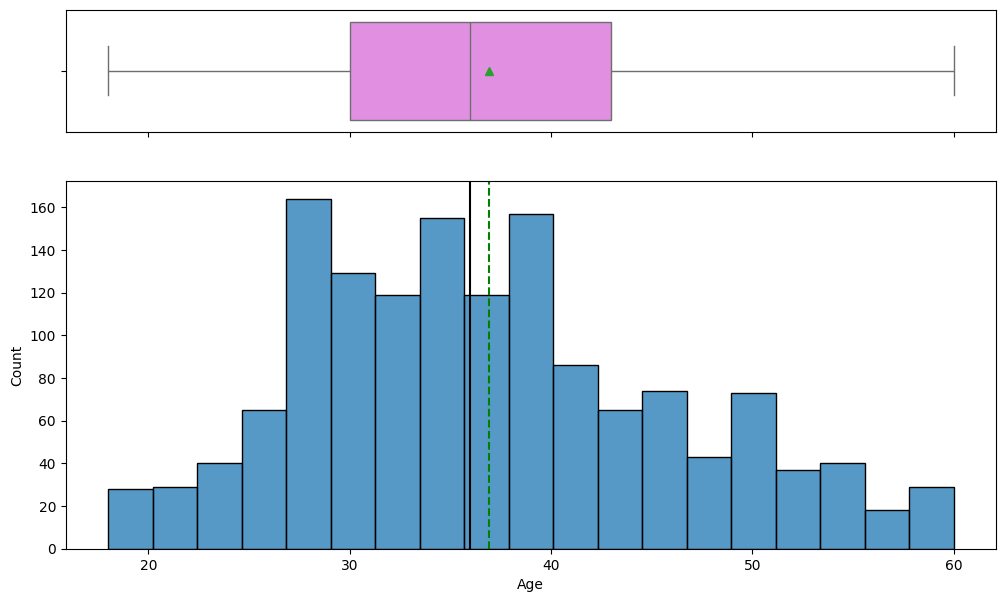

In [15]:
#We plot a histogram and box plot for age
histogram_boxplot(data, 'Age')

1. Age has an almost normal distribution
2. Age has a median of approximately 36 years

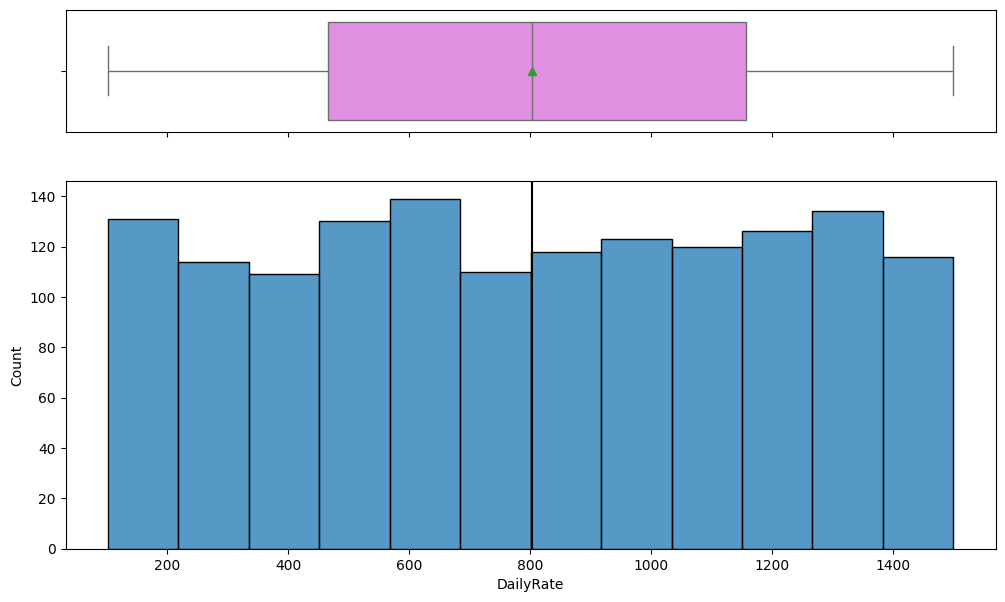

In [16]:
##We plot a histogram and box plot for DailyRate
histogram_boxplot(data, 'DailyRate')

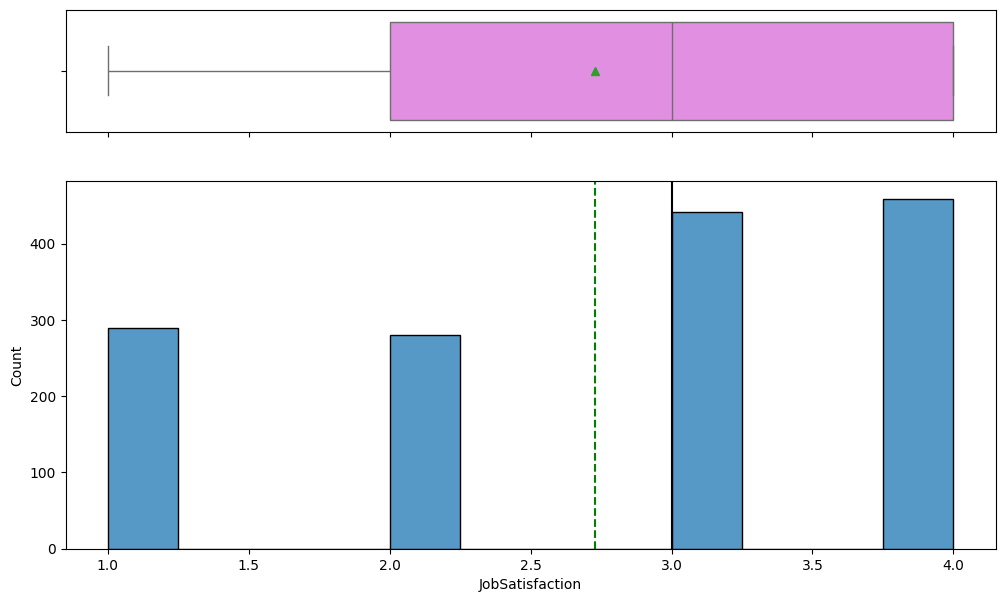

In [21]:
###We plot a histogram and box plot for JobSatisfaction
histogram_boxplot(data, 'JobSatisfaction')

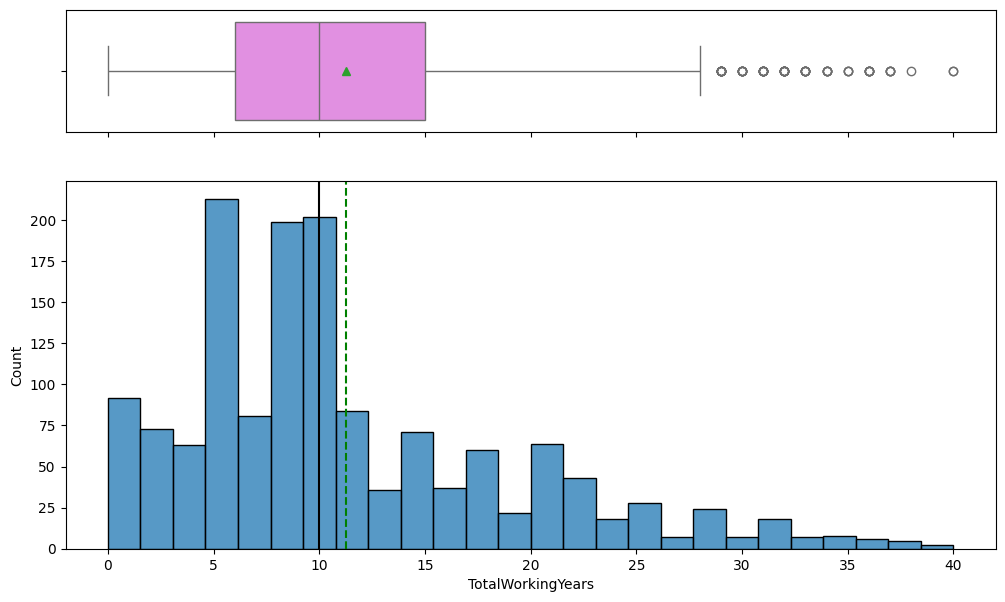

In [18]:
#We plot Total Working Years
histogram_boxplot(data, 'TotalWorkingYears')

1. The Total Working years data is skewed on the right.
2. TotalWorkingYears has many outliers on the right sugesting there are employees who have worked for many years than normal

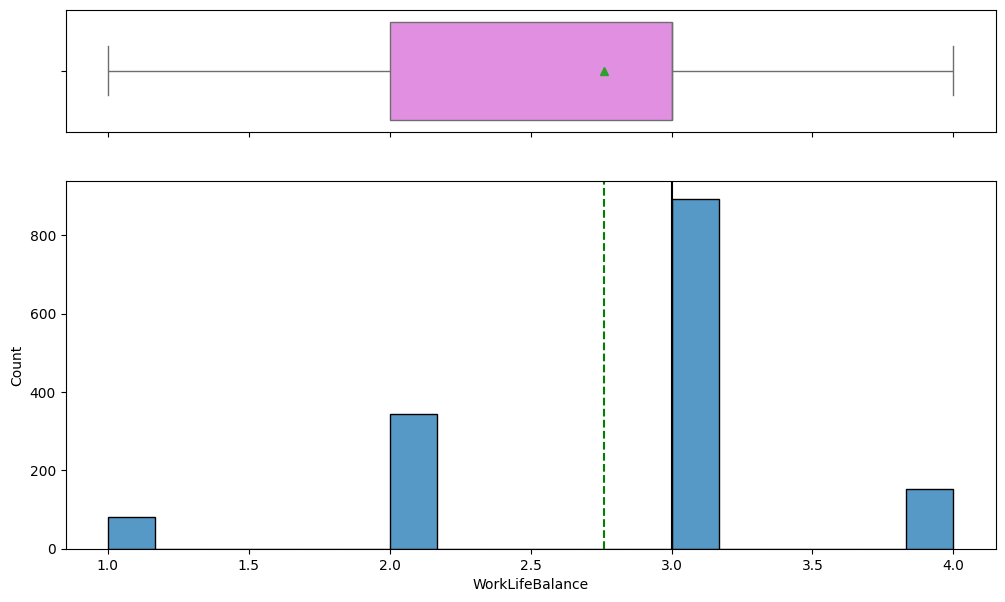

In [20]:
#We plot Work Life Balance
histogram_boxplot(data, 'WorkLifeBalance')

## Univariate for columns with Object data types

In [22]:
# Create a function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

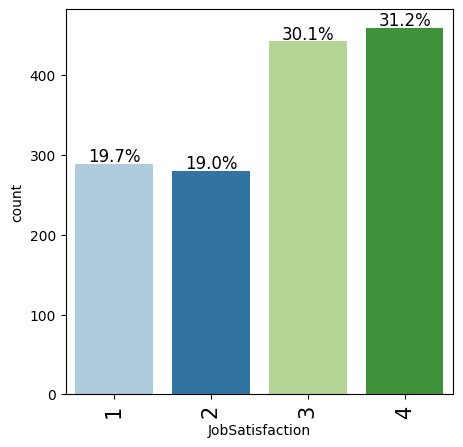

In [23]:
#We plot Attrition
labeled_barplot(data, 'JobSatisfaction', perc=True)

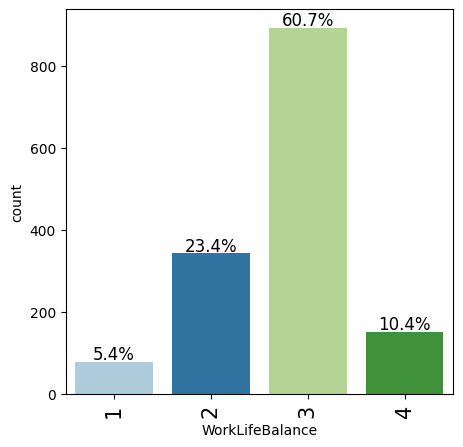

In [24]:
#We plot Business Travel
labeled_barplot(data, 'WorkLifeBalance', perc=True)

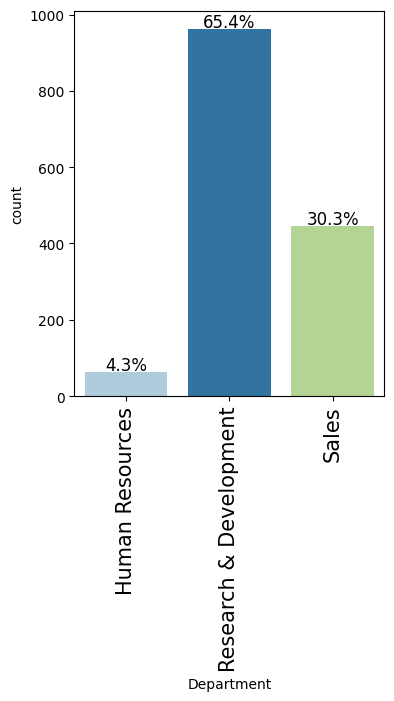

In [25]:
#We plot Department
labeled_barplot(data, 'Department', perc=True)

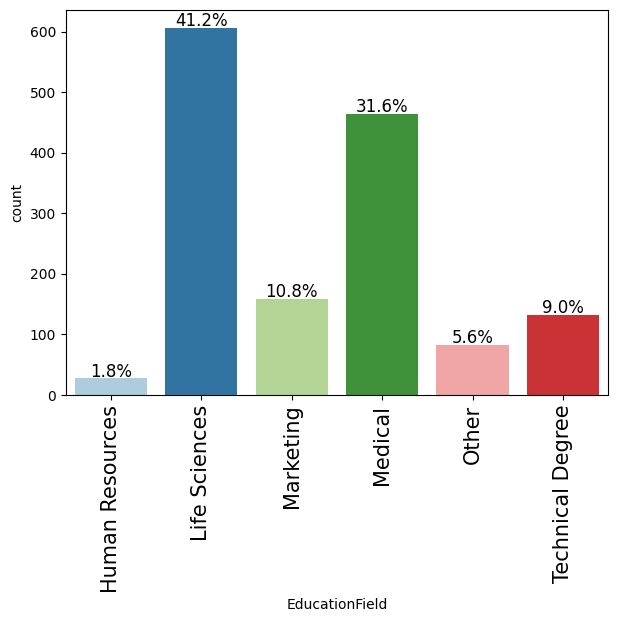

In [26]:
#We plot Education Field
labeled_barplot(data, 'EducationField', perc=True)

In [27]:
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
            'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
            'YearsWithCurrManager']

data_cor = data[num_cols]

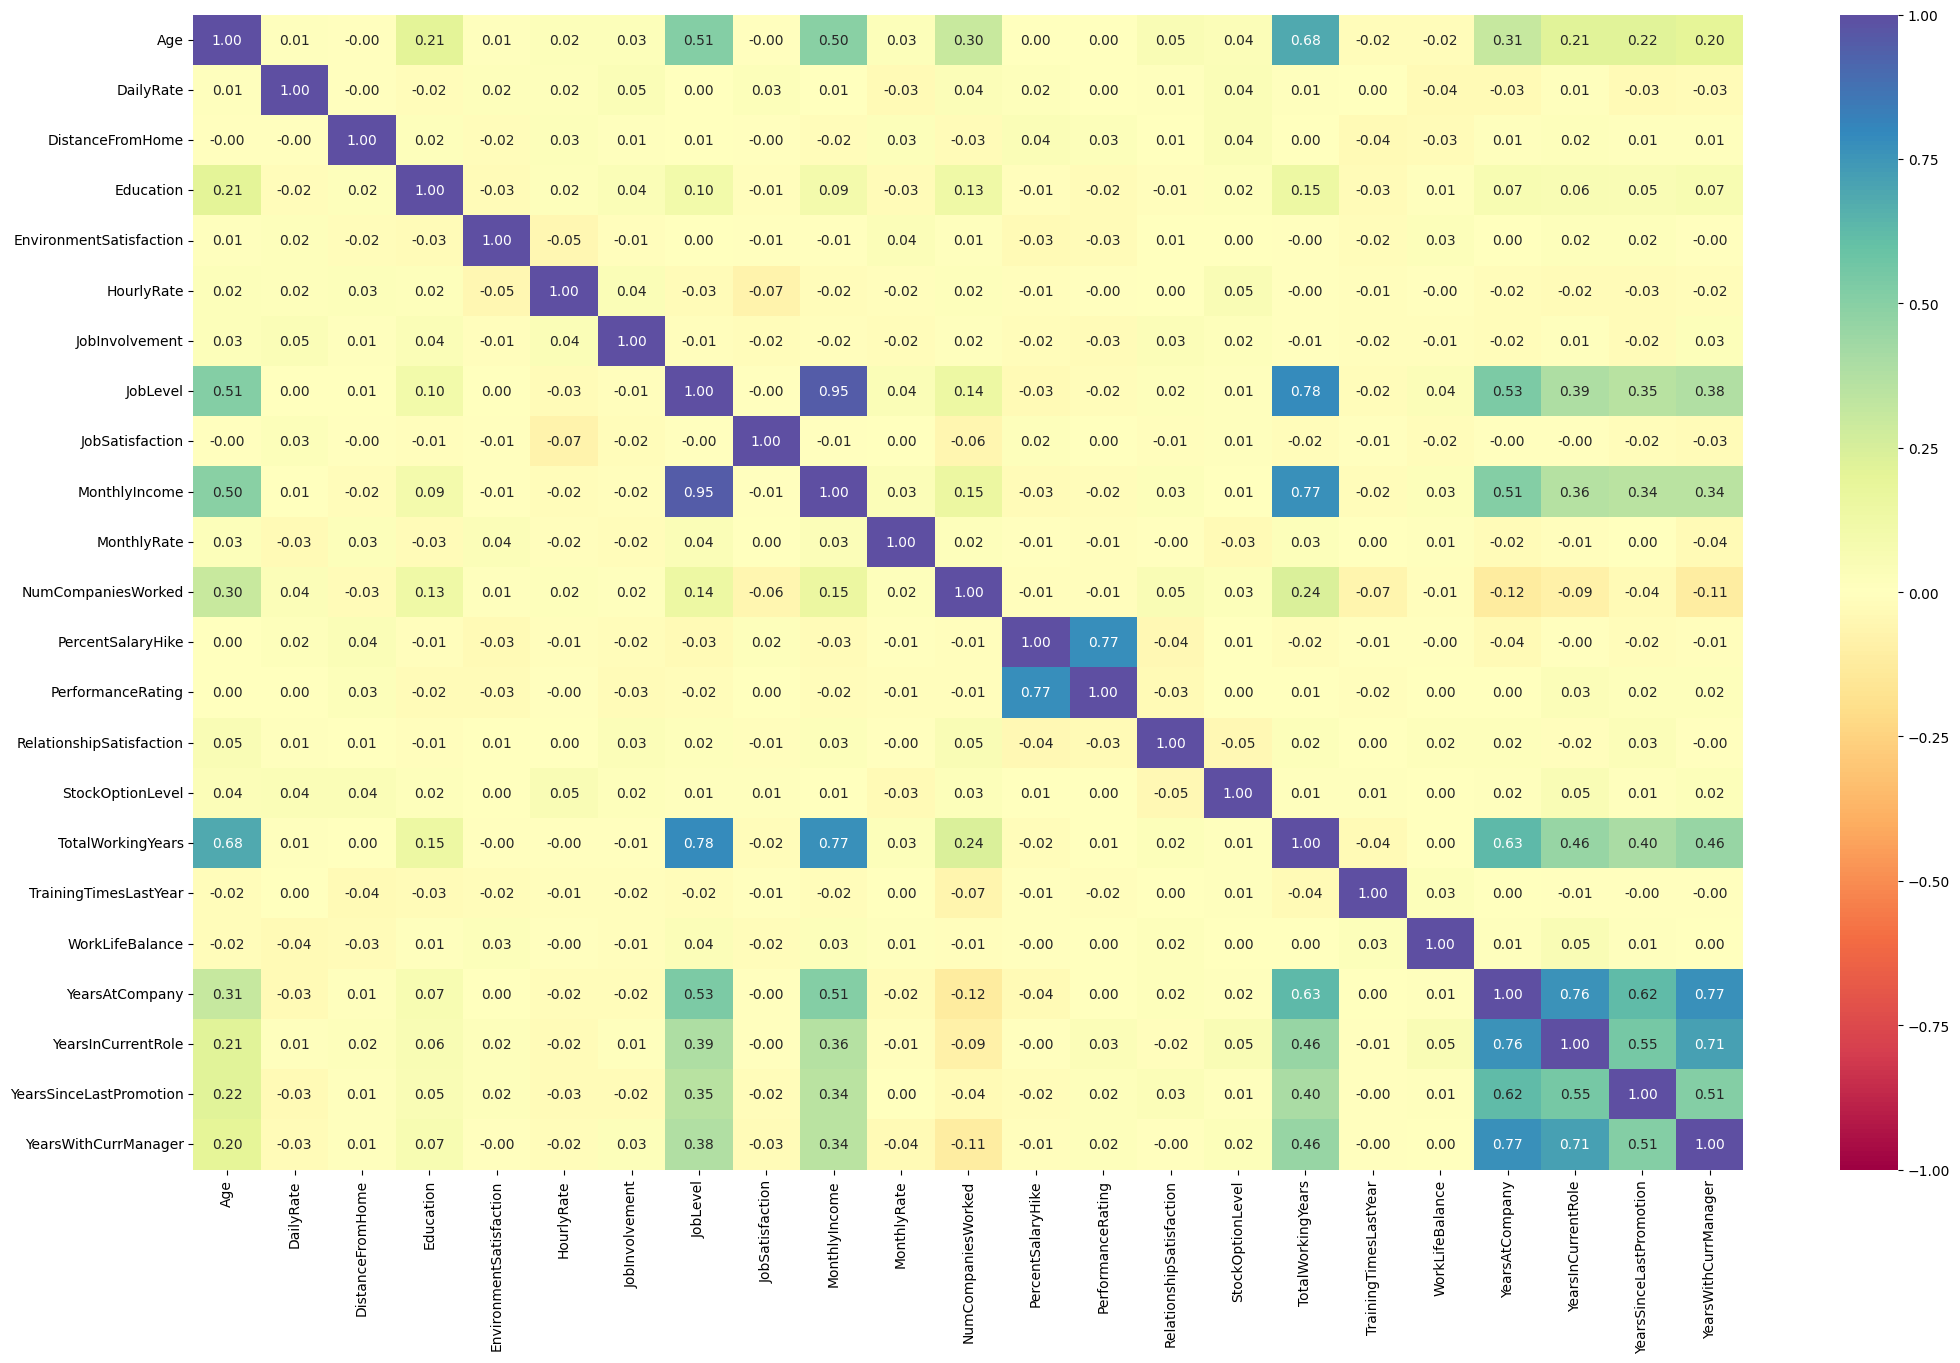

In [28]:
# Conduct correlation Analysis to determine how variables are related
plt.figure(figsize=(25, 15))
sns.heatmap(
    data_cor.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**High Correlation Features with Performance Rating**

Based on the correlation analysis:

* **JobSatisfaction:** Employees with higher job satisfaction tend to exhibit better performance. This aligns with common sense and research findings that indicate employee well-being and engagement are crucial for productivity. 
* **WorkLifeBalance:** A positive work-life balance is associated with improved performance. This suggests that when employees can effectively balance their work and personal lives, they are more likely to be productive and engaged.
* **YearsInCurrentRole:** Employees who have been in their current role for a longer duration tend to perform better. This could be attributed to several factors, such as increased experience, knowledge of the role and company, and established relationships with colleagues and managers.
* **Total Working Years:** Total experience impacts an employee's capability and decision-making.



# 2. Data Preprocessing
*   Duplicate value check
*   Missing value treatment
*   Outlier check
*   Feature engineering (if needed)
*   Any other preprocessing steps (if needed)


In [29]:
#duplicate value check
data.duplicated().sum()

np.int64(0)

In [30]:
#Missing value check
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

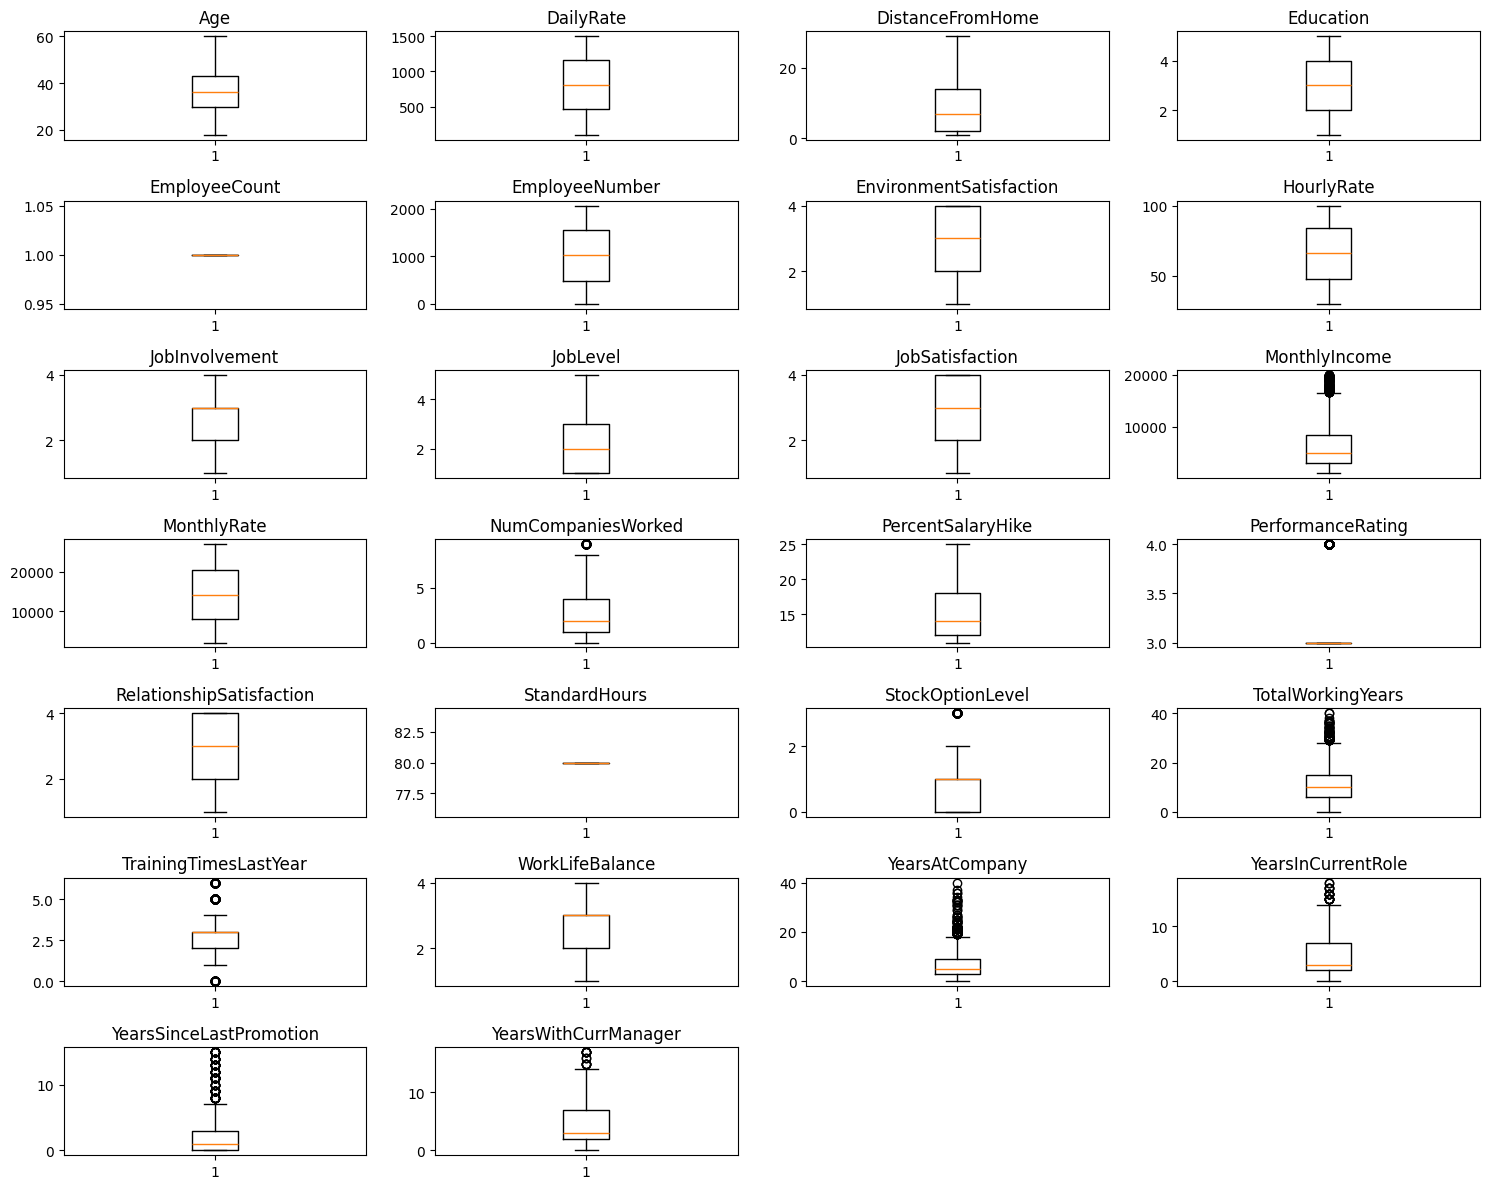

In [31]:
#To show outliers we prepare Box plots for all numerical values
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns for the subplot grid
num_rows = 7
num_cols = 4
num_plots = num_rows * num_cols  # Total number of plots

# Loop through numeric columns and create subplots
for i, variable in enumerate(numeric_columns):
    # Check if we need to create a new figure
    if i >= num_plots:
        plt.show()  # Show the current figure
        plt.figure(figsize=(15, 12))  # Create a new figure
        i = 0  # Reset the subplot index

    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()  # Show the last figure

Totalworkinghours, Trainingtimeslastyear, Yearsatcompany, Yearsincurrentrole, YerasSinceLastPromotion and YearsWithCurrentmanager have outliers.

In [32]:
# Handle outliers using IQR for relevant features
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply outlier handling to relevant features
outlier_columns = ['TotalWorkingYears', 'YearsInCurrentRole']
for col in outlier_columns:
    data = handle_outliers(data, col)

# Verify that outliers are handled
print(data[outlier_columns].describe())


       TotalWorkingYears  YearsInCurrentRole
count           1470.000            1470.000
mean              11.103               4.208
std                7.304               3.555
min                0.000               0.000
25%                6.000               2.000
50%               10.000               3.000
75%               15.000               7.000
max               28.500              14.500


In [33]:
# Selecting high-correlation features based on your analysis
selected_features = ['JobSatisfaction', 'WorkLifeBalance', 'YearsInCurrentRole', 'TotalWorkingYears']
X = data[selected_features]  # Subset of features for VIF calculation

# Scale the selected features for VIF calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display VIF scores
print("Variance Inflation Factor (VIF):")
print(vif_data)

# Check for high VIF values
# Remove features with VIF > 10 (if any) before proceeding with modeling
high_vif_features = vif_data[vif_data["VIF"] > 10]
if not high_vif_features.empty:
    print("Warning: The following features have high multicollinearity and should be removed or addressed:")
    print(high_vif_features)
else:
    print("No multicollinearity issues detected.")

# Continue with the modeling process if no high VIF features exist



Variance Inflation Factor (VIF):
              Feature   VIF
0     JobSatisfaction 1.001
1     WorkLifeBalance 1.003
2  YearsInCurrentRole 1.279
3   TotalWorkingYears 1.277
No multicollinearity issues detected.


# 3. Modelling

In [34]:
#We make a copy of the data for modelling
data_model=data.copy()

In [36]:
# Specify the features (X) and the target variable (Y)
selected_features = ['WorkLifeBalance', 'YearsInCurrentRole', 'TotalWorkingYears']
X = data_model[selected_features]
Y = data_model['PerformanceRating']  # Target variable

In [37]:
# View data for X Dataframe
X.head()

WorkLifeBalance  YearsInCurrentRole  TotalWorkingYears
0                1               4.000              8.000
1                3               7.000             10.000
2                3               0.000              7.000
3                3               7.000              8.000
4                3               2.000              6.000

In [38]:
# View class labels in Y dataframe
Y.head()

0    3
1    4
2    3
3    3
4    3
Name: PerformanceRating, dtype: int64

In [39]:
#split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [40]:
#confirm the split
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data_model.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data_model.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [41]:
# Apply SMOTE to handle imbalanced data
smote = SMOTE(random_state=1)  # Initialize SMOTE
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)  # Resample training data

In [42]:
# Confirm the new distribution of classes in y_train_smote
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
PerformanceRating
3    873
4    873
Name: count, dtype: int64


In [43]:
# Define a Function to compute different metrics to check classification model performance
def model_performance_classification_sklearn(model, predictors, target):


    # Classifying using the independent variables
    class_labels = model.predict(predictors)

    acc = accuracy_score(target, class_labels)  # to compute Accuracy
    recall = recall_score(target, class_labels, pos_label=3)  # to compute Recall, set pos_label to match your target labels
    precision = precision_score(target, class_labels, pos_label=3)  # to compute Precision, set pos_label to match your target labels
    f1 = f1_score(target, class_labels, pos_label=3)  # to compute F1-score, set pos_label to match your target labels

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
          "Accuracy": acc,
           "Recall": recall,
           "Precision": precision,
           "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [44]:
#Define a function to compute confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    classified_labels = model.predict(predictors)
    cm = confusion_matrix(target, classified_labels)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# 4. Fitting Models using Lazydirect

In [48]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train_smote, x_test, y_train_smote, y_test)

100%|██████████| 32/32 [00:03<00:00, 10.24it/s]

[LightGBM] [Info] Number of positive: 873, number of negative: 873
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 1746, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [49]:
#Print the models
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier       0.585              0.545    0.545     0.640   
NuSVC                             0.567              0.528    0.528     0.625   
Perceptron                        0.610              0.513    0.513     0.658   
LGBMClassifier                    0.714              0.511    0.511     0.726   
DummyClassifier                   0.841              0.500    0.500     0.769   
RandomForestClassifier            0.694              0.499    0.499     0.712   
ExtraTreeClassifier               0.714              0.494    0.494     0.722   
KNeighborsClassifier              0.680              0.491    0.491     0.702   
QuadraticDiscriminantAnalysis     0.533              0.491    0.491     0.596   
ExtraTreesClassifier              0.707              0.490    0.490     0.717   
DecisionTreeClassifier      

# 5.1 Building the Decision Tree Model

In [50]:
#Buiding the Decision tree Model
# Define hyperparameters for tuning
dt_params = {
    "max_depth": [3, 5, 10, None],  # Limit tree depth to reduce complexity
    "min_samples_split": [2, 5, 10],  # Minimum samples to split an internal node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples in a leaf
    "criterion": ["gini", "entropy"]  # Use Gini or Entropy for splitting
}

# Perform Randomized Search to tune hyperparameters
dtree = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dtree_search = RandomizedSearchCV(dtree, param_distributions=dt_params, n_iter=50, cv=5, scoring="f1_weighted", random_state=42, n_jobs=-1)
dtree_search.fit(x_train_smote, y_train_smote)

# Use the best model from hyperparameter tuning
dtree_estimator = dtree_search.best_estimator_
print(f"Best Decision Tree Parameters: {dtree_search.best_params_}")

# Train the Decision Tree with tuned hyperparameters
dtree_estimator.fit(x_train_smote, y_train_smote)

Best Decision Tree Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}


DecisionTreeClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=1)

In [51]:
#Show parameters used to generate the classifier
print(dtree_estimator)

DecisionTreeClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=1)


In [52]:
# Display class labels for Decision Tree model
print("Class labels for Decision Tree:", dtree_estimator.classes_)

Class labels for Decision Tree: [3 4]


Confusion Matrix for Decision Tree on training set:


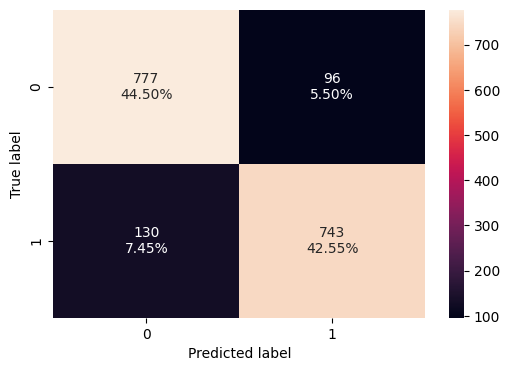

In [53]:
# Confusion Matrix for Training Set
print("Confusion Matrix for Decision Tree on training set:")
confusion_matrix_sklearn(dtree_estimator, x_train_smote, y_train_smote)

Confusion Matrix for Decision Tree on test set:


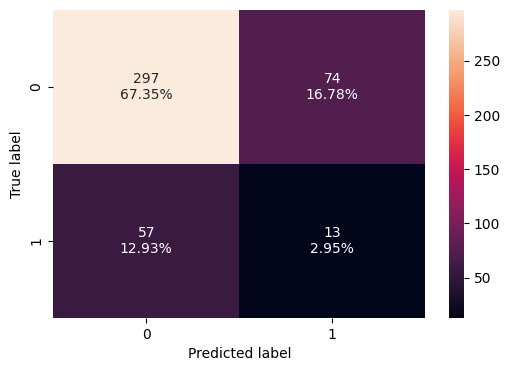

In [54]:
# Confusion Matrix for Test Set
print("Confusion Matrix for Decision Tree on test set:")
confusion_matrix_sklearn(dtree_estimator, x_test, y_test)

In [55]:
# Model Performance on Training Set
print("\nTraining performance for Decision Tree model:")
decision_tree_perf_train = model_performance_classification_sklearn(dtree_estimator, x_train_smote, y_train_smote)
print(decision_tree_perf_train)

# Model Performance on Test Set
print("\nTesting performance for Decision Tree model:")
dtree_estimator_test_perf = model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print(dtree_estimator_test_perf)


Training performance for Decision Tree model:
   Accuracy  Recall  Precision    F1
0     0.871   0.890      0.857 0.873

Testing performance for Decision Tree model:
   Accuracy  Recall  Precision    F1
0     0.703   0.801      0.839 0.819


      Metric  Training  Testing
0   Accuracy     0.871    0.703
1     Recall     0.871    0.703
2  Precision     0.871    0.730
3   F1 Score     0.871    0.716


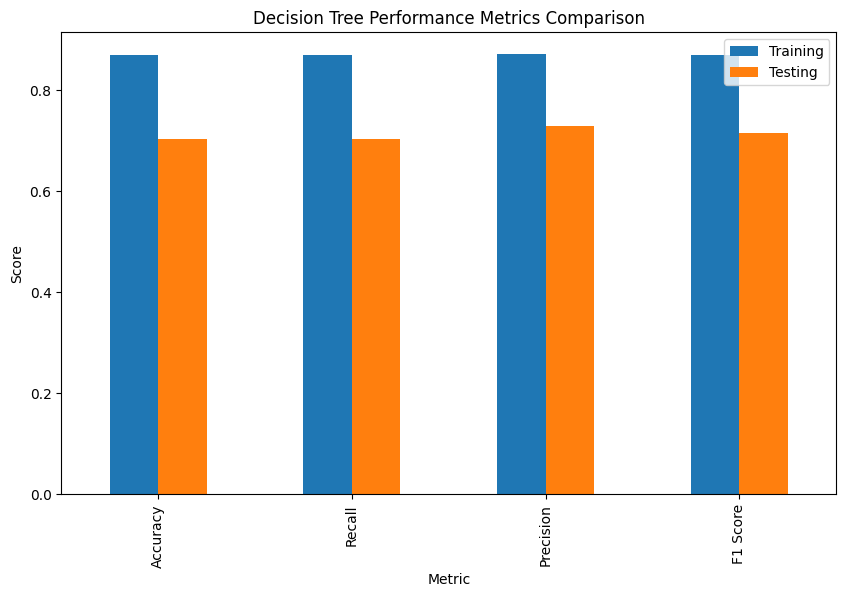

In [56]:
# Create a comparison table for Decision Tree
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Training": [accuracy_score(y_train_smote, dtree_estimator.predict(x_train_smote)),
                 recall_score(y_train_smote, dtree_estimator.predict(x_train_smote), average="weighted"),
                 precision_score(y_train_smote, dtree_estimator.predict(x_train_smote), average="weighted"),
                 f1_score(y_train_smote, dtree_estimator.predict(x_train_smote), average="weighted")],
    "Testing": [accuracy_score(y_test, dtree_estimator.predict(x_test)),
                recall_score(y_test, dtree_estimator.predict(x_test), average="weighted"),
                precision_score(y_test, dtree_estimator.predict(x_test), average="weighted"),
                f1_score(y_test, dtree_estimator.predict(x_test), average="weighted")]
})

print(metrics_df)

# Plot the metrics for Decision Tree
metrics_df.set_index("Metric").plot(kind="bar", figsize=(10, 6))
plt.title("Decision Tree Performance Metrics Comparison")
plt.ylabel("Score")
plt.show()


**Decision Tree:**

Strengths: The Decision Tree model performed decently on the training data, showcasing relatively high Accuracy, Precision, and F1 scores. It is interpretable and easy to visualize.

Weaknesses: Its performance on the testing data is comparatively weaker, indicating some level of overfitting to the training data. This suggests it may not generalize well to unseen data.


# 5.2 Building the Gradient Boosting Model

In [57]:
# Gradient Boosting Classifier
# Step 1: Hyperparameter Tuning for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Shrinks contribution of each tree
    'max_depth': [3, 4, 5, 6],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'subsample': [0.6, 0.8, 1.0]  # Fraction of samples used for fitting each tree
}

# Initialize the base Gradient Boosting Classifier
gbc_base = GradientBoostingClassifier(random_state=1)

# Perform hyperparameter tuning using RandomizedSearchCV
gbc_tuner = RandomizedSearchCV(
    estimator=gbc_base,
    param_distributions=param_grid,
    n_iter=20,  # Reduced from 50 to 20
    cv=3,  # Use 3-fold cross-validation instead of 5
    scoring="f1_weighted",
    random_state=1,
    n_jobs=-1,
    verbose=2
)
gbc_tuner.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1, scoring='f1_weighted', verbose=2)

In [58]:
# Use the best model
gbc_estimator = gbc_tuner.best_estimator_  # Preserve the name gbc_estimator for compatibility
print(f"Best parameters for Gradient Boosting: {gbc_tuner.best_params_}")

Best parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.1}


In [59]:
# Display class labels for GradientBoost model
print("Class labels for GradientBoost:", gbc_estimator.classes_)

Class labels for GradientBoost: [3 4]


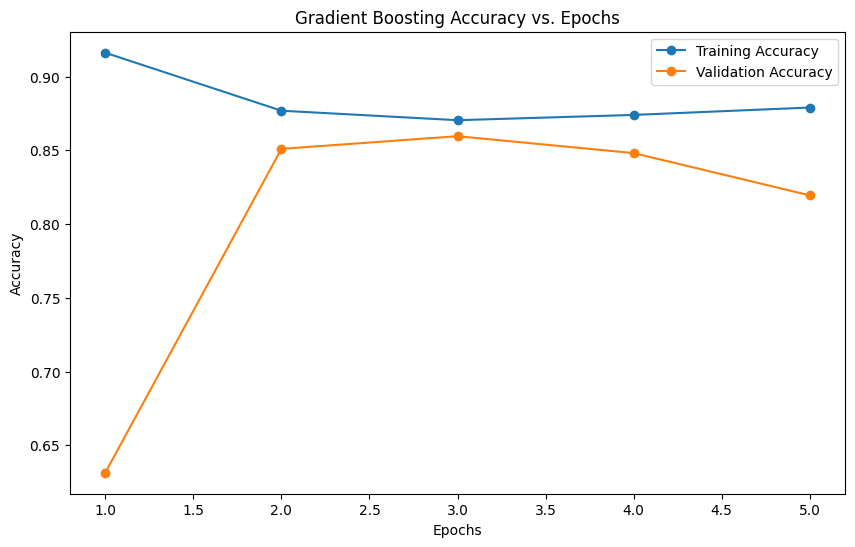

In [60]:
# Step 2: Accuracy vs. Epochs and Loss vs. Epochs Graphs
# Using StratifiedKFold for tracking training/validation performance
train_acc = []
val_acc = []
kf = StratifiedKFold(n_splits=5)

for train_idx, val_idx in kf.split(x_train_smote, y_train_smote):
    x_t, x_v = x_train_smote.iloc[train_idx], x_train_smote.iloc[val_idx]
    y_t, y_v = y_train_smote.iloc[train_idx], y_train_smote.iloc[val_idx]
    
    gbc_estimator.fit(x_t, y_t)
    train_acc.append(gbc_estimator.score(x_t, y_t))
    val_acc.append(gbc_estimator.score(x_v, y_v))

# Plotting Accuracy vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_acc) + 1), train_acc, label="Training Accuracy", marker="o")
plt.plot(range(1, len(val_acc) + 1), val_acc, label="Validation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Gradient Boosting Accuracy vs. Epochs")
plt.legend()
plt.show()


In [61]:
# Step 3: Evaluate Model Performance
print("Training performance for Gradient Boosting model:")
gbc_perf_train = model_performance_classification_sklearn(gbc_estimator, x_train_smote, y_train_smote)
print(gbc_perf_train)

print("Testing performance for Gradient Boosting model:")
gbc_perf_test = model_performance_classification_sklearn(gbc_estimator, x_test, y_test)
print(gbc_perf_test)

Training performance for Gradient Boosting model:
   Accuracy  Recall  Precision    F1
0     0.867   0.865      0.869 0.867
Testing performance for Gradient Boosting model:
   Accuracy  Recall  Precision    F1
0     0.692   0.784      0.839 0.811


Confusion Matrix for Gradient Boosting on training set:


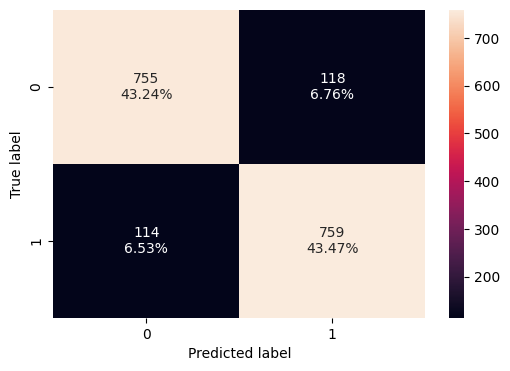

In [62]:
# Step 4: Plot Confusion Matrices
print("Confusion Matrix for Gradient Boosting on training set:")
confusion_matrix_sklearn(gbc_estimator, x_train_smote, y_train_smote)

Confusion Matrix for Gradient Boosting on test set:


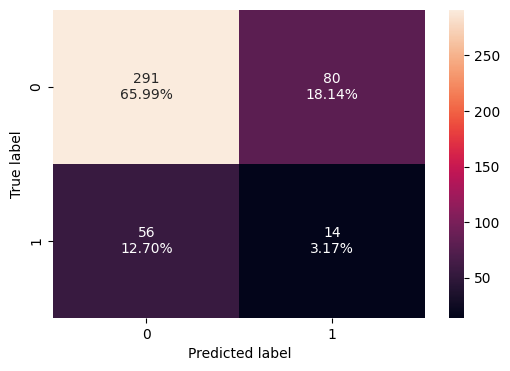

In [63]:
print("Confusion Matrix for Gradient Boosting on test set:")
confusion_matrix_sklearn(gbc_estimator, x_test, y_test)

Gradient Boosting Performance Metrics Comparison
      Metric  Training  Testing
0   Accuracy     0.867    0.692
1     Recall     0.867    0.692
2  Precision     0.867    0.729
3   F1 Score     0.867    0.709


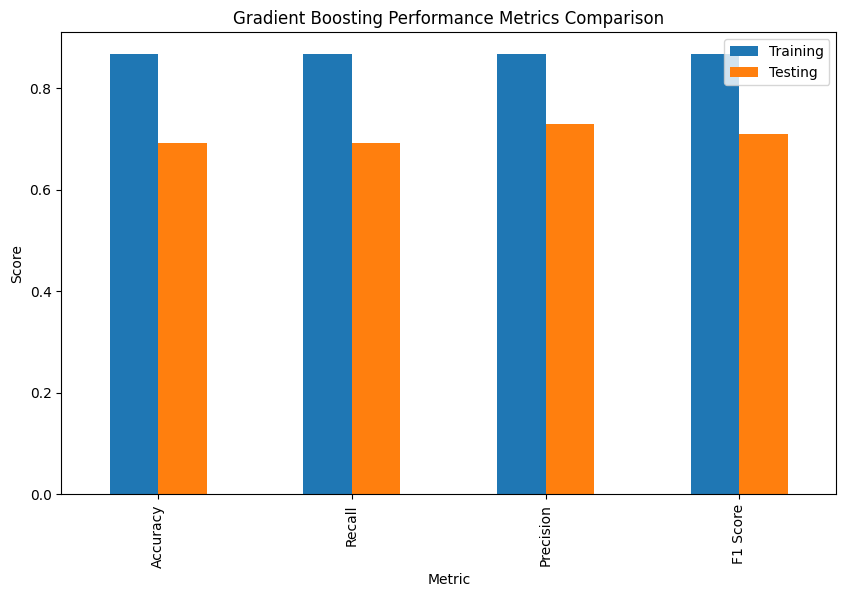

In [64]:
# Create a comparison table for Gradient Boosting
gbc_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Training": [
        accuracy_score(y_train_smote, gbc_estimator.predict(x_train_smote)),
        recall_score(y_train_smote, gbc_estimator.predict(x_train_smote), average="weighted"),
        precision_score(y_train_smote, gbc_estimator.predict(x_train_smote), average="weighted"),
        f1_score(y_train_smote, gbc_estimator.predict(x_train_smote), average="weighted")
    ],
    "Testing": [
        accuracy_score(y_test, gbc_estimator.predict(x_test)),
        recall_score(y_test, gbc_estimator.predict(x_test), average="weighted"),
        precision_score(y_test, gbc_estimator.predict(x_test), average="weighted"),
        f1_score(y_test, gbc_estimator.predict(x_test), average="weighted")
    ]
})

# Print the metrics DataFrame
print("Gradient Boosting Performance Metrics Comparison")
print(gbc_metrics_df)

# Plot the metrics for Gradient Boosting
gbc_metrics_df.set_index("Metric").plot(kind="bar", figsize=(10, 6))
plt.title("Gradient Boosting Performance Metrics Comparison")
plt.ylabel("Score")
plt.show()


**Gradient Boosting:**

Strengths: Gradient Boosting provided a balanced performance across training and testing datasets. Its testing metrics are consistent, though slightly lower than the ensemble model.

Weaknesses: Gradient Boosting requires significant computation time, especially for larger datasets, and its testing F1 score is marginally lower than the ensemble model.

# 5.3 Building the LGBMClassifier Model

In [66]:
# Build and fit an LGBMClassifier
# Step 1: Hyperparameter Tuning for LGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 3, 5, 7],
    'num_leaves': [31, 50, 70],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the base LGBM Classifier
lgbm_base = LGBMClassifier(random_state=1)

# Perform Randomized Search for hyperparameter tuning
lgbm_tuner = RandomizedSearchCV(
    estimator=lgbm_base,
    param_distributions=param_grid,
    n_iter=20,  # Reduced iterations for efficiency
    cv=3,  # Fewer folds for quicker evaluation
    scoring="f1_weighted",
    random_state=1,
    n_jobs=-1,
    verbose=1
)
lgbm_tuner.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 873, number of negative: 873
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1746, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=1), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [-1, 3, 5, 7],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [31, 50, 70],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1, scoring='f1_weighted', verbose=1)

In [67]:
# Use the best model
lgbm_estimator = lgbm_tuner.best_estimator_  # Preserve name for consistency
print(f"Best parameters for LGBM: {lgbm_tuner.best_params_}")

Best parameters for LGBM: {'subsample': 0.6, 'num_leaves': 31, 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [68]:
# Display class labels for LGBMClassifier
print("Class labels for LGBMClassifier:", lgbm_estimator.classes_)

Class labels for LGBMClassifier: [3 4]


[LightGBM] [Info] Number of positive: 698, number of negative: 698
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1396, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

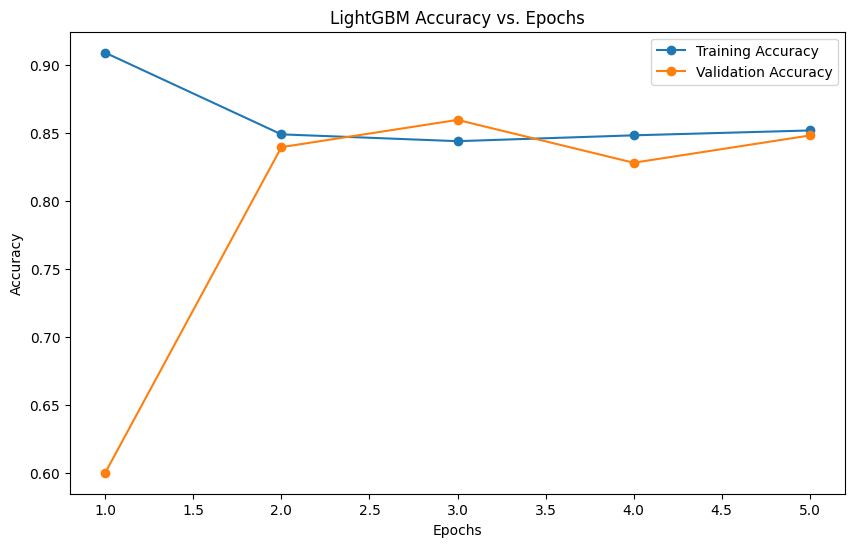

In [69]:
# Step 2: Accuracy vs. Epochs Visualization
# Using StratifiedKFold for tracking training/validation performance
train_acc = []
val_acc = []
kf = StratifiedKFold(n_splits=5)

for train_idx, val_idx in kf.split(x_train_smote, y_train_smote):
    x_t, x_v = x_train_smote.iloc[train_idx], x_train_smote.iloc[val_idx]
    y_t, y_v = y_train_smote.iloc[train_idx], y_train_smote.iloc[val_idx]
    
    lgbm_estimator.fit(x_t, y_t)
    train_acc.append(lgbm_estimator.score(x_t, y_t))
    val_acc.append(lgbm_estimator.score(x_v, y_v))

# Plotting Accuracy vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_acc) + 1), train_acc, label="Training Accuracy", marker="o")
plt.plot(range(1, len(val_acc) + 1), val_acc, label="Validation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LightGBM Accuracy vs. Epochs")
plt.legend()
plt.show()

In [70]:
# Step 3: Evaluate Model Performance
print("\nTraining performance for LGBM model:")
lgbm_perf_train = model_performance_classification_sklearn(lgbm_estimator, x_train_smote, y_train_smote)
print(lgbm_perf_train)

print("\nTesting performance for LGBM model:")
lgbm_perf_test = model_performance_classification_sklearn(lgbm_estimator, x_test, y_test)
print(lgbm_perf_test)


Training performance for LGBM model:
   Accuracy  Recall  Precision    F1
0     0.851   0.885      0.829 0.856

Testing performance for LGBM model:
   Accuracy  Recall  Precision    F1
0     0.705   0.811      0.834 0.822


In [71]:
# We check the performance of the LGBMClassifier on the test set by creating the confusion matrix
print("Training performance for LGBM model:")
lgbm_perf_train = model_performance_classification_sklearn(lgbm_estimator, x_train_smote, y_train_smote)
print(lgbm_perf_train)

print("Testing performance for LGBM model:")
lgbm_perf_test = model_performance_classification_sklearn(lgbm_estimator, x_test, y_test)
print(lgbm_perf_test)

Training performance for LGBM model:
   Accuracy  Recall  Precision    F1
0     0.851   0.885      0.829 0.856
Testing performance for LGBM model:
   Accuracy  Recall  Precision    F1
0     0.705   0.811      0.834 0.822



Confusion Matrix for LGBM on training set:


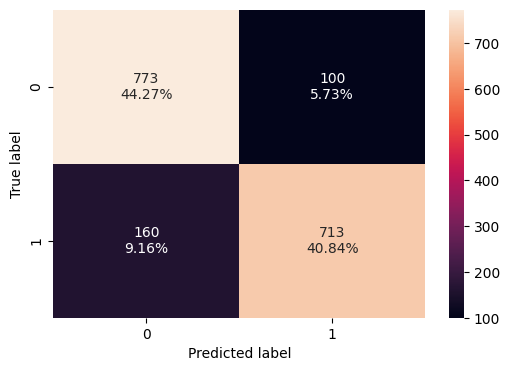

In [72]:
# Step 4: Plot Confusion Matrices
print("\nConfusion Matrix for LGBM on training set:")
confusion_matrix_sklearn(lgbm_estimator, x_train_smote, y_train_smote)


Confusion Matrix for LGBM on test set:


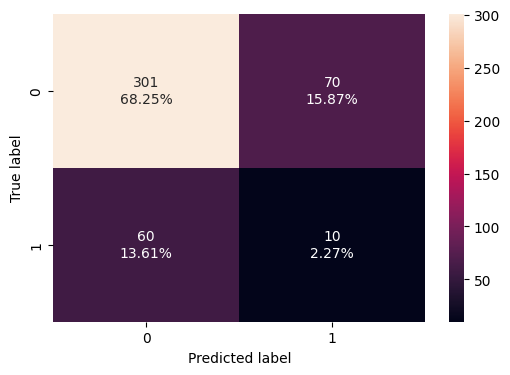

In [73]:
print("\nConfusion Matrix for LGBM on test set:")
confusion_matrix_sklearn(lgbm_estimator, x_test, y_test)


LightGBM Performance Metrics Comparison
      Metric  Training  Testing
0   Accuracy     0.851    0.705
1     Recall     0.851    0.705
2  Precision     0.853    0.721
3   F1 Score     0.851    0.713


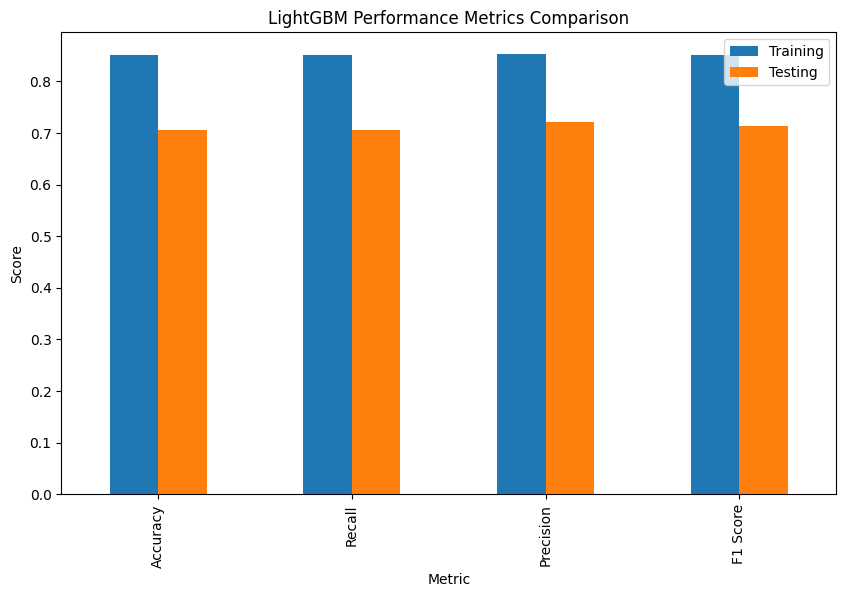

In [74]:
# Step 5: Comparison Table for LGBM
lgbm_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Training": [
        accuracy_score(y_train_smote, lgbm_estimator.predict(x_train_smote)),
        recall_score(y_train_smote, lgbm_estimator.predict(x_train_smote), average="weighted"),
        precision_score(y_train_smote, lgbm_estimator.predict(x_train_smote), average="weighted"),
        f1_score(y_train_smote, lgbm_estimator.predict(x_train_smote), average="weighted")
    ],
    "Testing": [
        accuracy_score(y_test, lgbm_estimator.predict(x_test)),
        recall_score(y_test, lgbm_estimator.predict(x_test), average="weighted"),
        precision_score(y_test, lgbm_estimator.predict(x_test), average="weighted"),
        f1_score(y_test, lgbm_estimator.predict(x_test), average="weighted")
    ]
})

# Print the metrics DataFrame
print("\nLightGBM Performance Metrics Comparison")
print(lgbm_metrics_df)

# Plot the metrics for LightGBM
lgbm_metrics_df.set_index("Metric").plot(kind="bar", figsize=(10, 6))
plt.title("LightGBM Performance Metrics Comparison")
plt.ylabel("Score")
plt.show()

**LightGBM:**

Strengths: LightGBM is close to the ensemble in terms of F1 score and Precision, showing good generalization across metrics. It is computationally efficient and suitable for larger datasets.

Weaknesses: While LightGBM's metrics are strong, it slightly underperformed the ensemble in Recall, which may indicate less robustness in identifying the minority class.

# 5.4 Ensemble model

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Add Random Forestto the ensemble
rf_estimator = RandomForestClassifier(n_estimators=100, random_state=1)

# Define a grid of possible weights for each model
param_grid = {
    "weights": [
        [1, 1, 3, 3],
        [1, 2, 3, 3],
        [1, 1, 2, 3],
        [2, 2, 3, 3],
        [1, 2, 2, 3],
        [1, 3, 2, 3]
    ]
}

# Function to evaluate performance for a specific weight combination
def evaluate_weights(weights):
    # Create the VotingClassifier with the given weights
    ensemble_model = VotingClassifier(
        estimators=[
            ('dtree', dtree_estimator),
            ('lgbm', lgbm_estimator),
            ('gbc', gbc_estimator),
            ('rf', rf_estimator)
        ],
        voting='soft',
        weights=weights
    )
    # Fit the model
    ensemble_model.fit(x_train_smote, y_train_smote)
    
    # Evaluate performance on the test set (F1-score as an example metric)
    y_pred = ensemble_model.predict(x_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    return f1

# Perform the grid search
best_weights = None
best_score = 0

for weights in param_grid['weights']:
    score = evaluate_weights(weights)
    print(f"Weights: {weights}, F1 Score: {score}")
    
    if score > best_score:
        best_score = score
        best_weights = weights

# Output the best weights and score
print(f"\nBest Weights: {best_weights}")
print(f"Best F1 Score: {best_score}")

# Train the final ensemble model with the best weights
final_ensemble_model = VotingClassifier(
    estimators=[
        ('dtree', dtree_estimator),
        ('lgbm', lgbm_estimator),
        ('gbc', gbc_estimator),
        ('rf', rf_estimator)
    ],
    voting='soft',
    weights=best_weights
)
final_ensemble_model.fit(x_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 873, number of negative: 873
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1746, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

VotingClassifier(estimators=[('dtree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     min_samples_split=5,
                                                     random_state=1)),
                             ('lgbm',
                              LGBMClassifier(colsample_bytree=0.8,
                                             learning_rate=0.2, max_depth=7,
                                             n_estimators=300, random_state=1,
                                             subsample=0.6)),
                             ('gbc',
                              GradientBoostingClassifier(max_depth=6,
                                                         min_samples_leaf=4,
                                                         min_samples_split=10,
                                                         n_estimators=300,
                                                         random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1))],
                 voting='soft', weights=[1, 1, 3, 3])


Final Ensemble Training Performance:
   Accuracy  Recall  Precision    F1
0     0.880   0.891      0.871 0.881

Final Ensemble Testing Performance:
   Accuracy  Recall  Precision    F1
0     0.705   0.803      0.839 0.821

Confusion Matrix for Final Ensemble on Test Set:


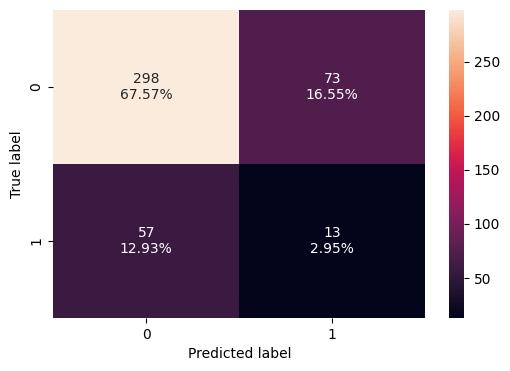

In [76]:
# Evaluate the final model
print("\nFinal Ensemble Training Performance:")
final_ensemble_perf_train = model_performance_classification_sklearn(final_ensemble_model, x_train_smote, y_train_smote)
print(final_ensemble_perf_train)

print("\nFinal Ensemble Testing Performance:")
final_ensemble_perf_test = model_performance_classification_sklearn(final_ensemble_model, x_test, y_test)
print(final_ensemble_perf_test)

# Confusion matrix for the final ensemble model
print("\nConfusion Matrix for Final Ensemble on Test Set:")
confusion_matrix_sklearn(final_ensemble_model, x_test, y_test)


In [77]:
# Combine results into a unified performance table for all models
models = ['Decision Tree', 'Gradient Boosting', 'LightGBM', 'Ensemble']

# Collect metrics for Training
training_scores = {
    "Accuracy": [
        decision_tree_perf_train['Accuracy'].values[0],
        gbc_perf_train['Accuracy'].values[0],
        lgbm_perf_train['Accuracy'].values[0],
        final_ensemble_perf_train['Accuracy'].values[0]
    ],
    "Precision": [
        decision_tree_perf_train['Precision'].values[0],
        gbc_perf_train['Precision'].values[0],
        lgbm_perf_train['Precision'].values[0],
        final_ensemble_perf_train['Precision'].values[0]
    ],
    "Recall": [
        decision_tree_perf_train['Recall'].values[0],
        gbc_perf_train['Recall'].values[0],
        lgbm_perf_train['Recall'].values[0],
        final_ensemble_perf_train['Recall'].values[0]
    ],
    "F1 Score": [
        decision_tree_perf_train['F1'].values[0],
        gbc_perf_train['F1'].values[0],
        lgbm_perf_train['F1'].values[0],
        final_ensemble_perf_train['F1'].values[0]
    ]
}

# Collect metrics for Testing
testing_scores = {
    "Accuracy": [
        dtree_estimator_test_perf['Accuracy'].values[0],
        gbc_perf_test['Accuracy'].values[0],
        lgbm_perf_test['Accuracy'].values[0],
        final_ensemble_perf_test['Accuracy'].values[0]
    ],
    "Precision": [
        dtree_estimator_test_perf['Precision'].values[0],
        gbc_perf_test['Precision'].values[0],
        lgbm_perf_test['Precision'].values[0],
        final_ensemble_perf_test['Precision'].values[0]
    ],
    "Recall": [
        dtree_estimator_test_perf['Recall'].values[0],
        gbc_perf_test['Recall'].values[0],
        lgbm_perf_test['Recall'].values[0],
        final_ensemble_perf_test['Recall'].values[0]
    ],
    "F1 Score": [
        dtree_estimator_test_perf['F1'].values[0],
        gbc_perf_test['F1'].values[0],
        lgbm_perf_test['F1'].values[0],
        final_ensemble_perf_test['F1'].values[0]
    ]
}

# Create a DataFrame for model performance
performance_table = pd.DataFrame({
    "Model": models,
    "Training Accuracy": training_scores["Accuracy"],
    "Training Precision": training_scores["Precision"],
    "Training Recall": training_scores["Recall"],
    "Training F1 Score": training_scores["F1 Score"],
    "Testing Accuracy": testing_scores["Accuracy"],
    "Testing Precision": testing_scores["Precision"],
    "Testing Recall": testing_scores["Recall"],
    "Testing F1 Score": testing_scores["F1 Score"]
})

# Display the unified performance table
print("\nUnified Performance Table with Additional Metrics:")
print(performance_table)



Unified Performance Table with Additional Metrics:
               Model  Training Accuracy  Training Precision  Training Recall  \
0      Decision Tree              0.871               0.857            0.890   
1  Gradient Boosting              0.867               0.869            0.865   
2           LightGBM              0.851               0.829            0.885   
3           Ensemble              0.880               0.871            0.891   

   Training F1 Score  Testing Accuracy  Testing Precision  Testing Recall  \
0              0.873             0.703              0.839           0.801   
1              0.867             0.692              0.839           0.784   
2              0.856             0.705              0.834           0.811   
3              0.881             0.705              0.839           0.803   

   Testing F1 Score  
0             0.819  
1             0.811  
2             0.822  
3             0.821  


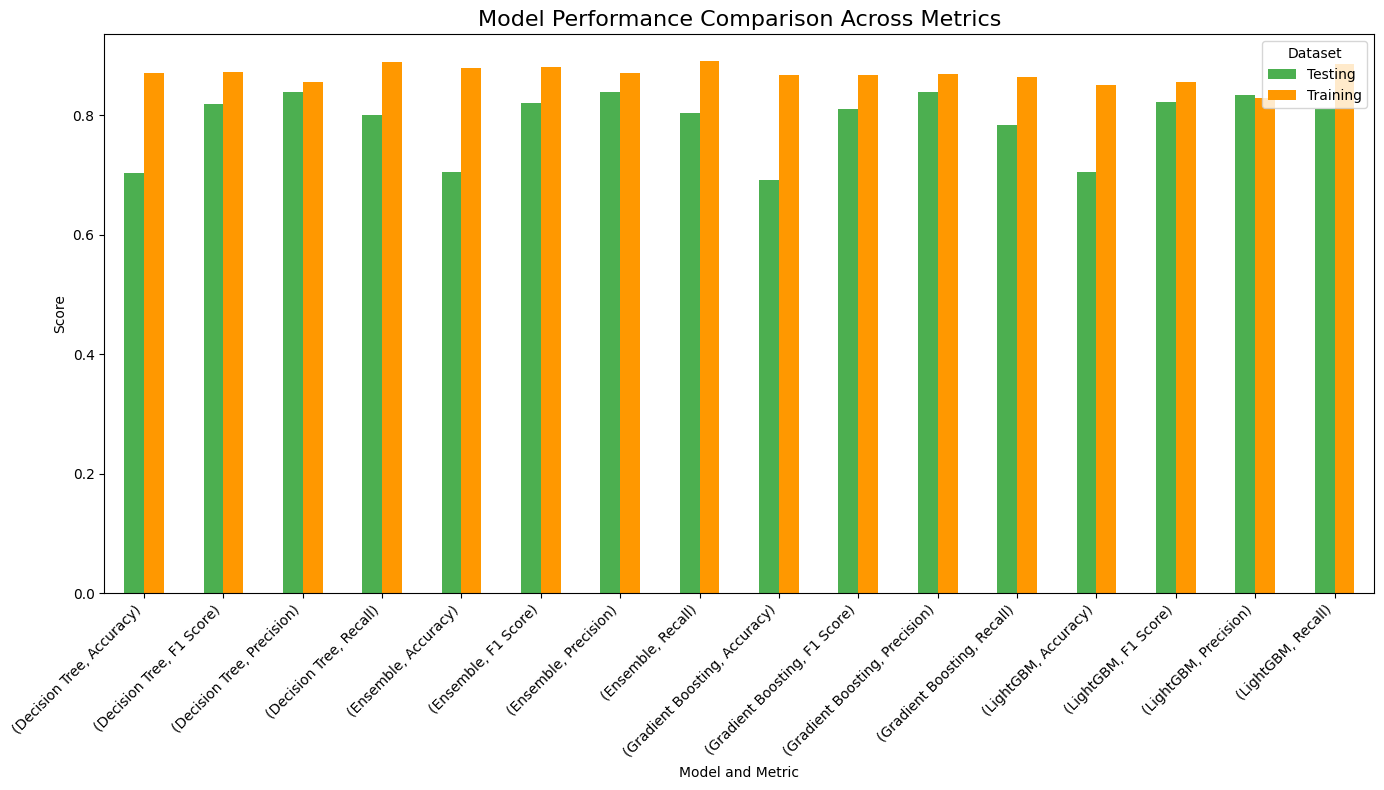

In [78]:
# Combine metrics into a long-format DataFrame for visualization
metrics_combined = pd.melt(
    performance_table,
    id_vars=["Model"],
    value_vars=[
        "Training Accuracy", "Testing Accuracy",
        "Training Precision", "Testing Precision",
        "Training Recall", "Testing Recall",
        "Training F1 Score", "Testing F1 Score"
    ],
    var_name="Metric Type",
    value_name="Score"
)

# Add a "Dataset" column to separate Training and Testing metrics
metrics_combined["Dataset"] = metrics_combined["Metric Type"].apply(lambda x: "Training" if "Training" in x else "Testing")

# Clean the "Metric Type" column for better labels
metrics_combined["Metric Type"] = metrics_combined["Metric Type"].str.replace("Training ", "").str.replace("Testing ", "")

# Pivot table for plotting
metrics_pivot = metrics_combined.pivot_table(
    index=["Model", "Metric Type"],
    columns="Dataset",
    values="Score"
).reset_index()

# Plot grouped bar chart for all metrics
fig, ax = plt.subplots(figsize=(14, 8))
metrics_pivot.set_index(["Model", "Metric Type"]).plot(
    kind="bar",
    ax=ax,
    stacked=False,
    color=["#4caf50", "#ff9800"]  # Customize colors for Training and Testing
)
plt.title("Model Performance Comparison Across Metrics", fontsize=16)
plt.ylabel("Score")
plt.xlabel("Model and Metric")
plt.legend(title="Dataset")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Reasons for Picking the Ensemble Model
* **Improved Overall Performance: it aligns with my priorities for robustness and accuracy in critical business decisions, and it delivers strong metrics of 82.1% F1 Score, 83.9% Precision, and 80.3% Recall on the test set.**

* **Combination of Strengths: By integrating Decision Tree, LightGBM, Gradient Boosting, and Random Forest, the ensemble model combines the strengths of multiple algorithms, leading to more robust predictions.**

* **Better Handling of Variance: The ensemble approach reduces the weaknesses of individual models, such as overfitting or underfitting, ensuring more consistent performance across metrics.**

In [79]:
# LIME Visualizations for Ensemble Model
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_smote),
    training_labels=np.array(y_train_smote),
    mode="classification",
    feature_names=x_train_smote.columns,
    class_names=['3', '4'],  
    discretize_continuous=True,
)

# 1. Global Interpretability (Explain a Random Test Instance)
# Select a test instance to explain
test_instance_index = 0  # Example: explaining the first test instance
test_instance = x_test.iloc[test_instance_index].values  # Features of the selected instance
true_label = y_test.iloc[test_instance_index]  # True label of the instance

# Generate explanation for the test instance
explanation = explainer.explain_instance(
    data_row=test_instance,
    predict_fn=final_ensemble_model.predict_proba,  # Pass the predict_proba method of your ensemble model
    num_features=5  # Number of features to display in the explanation
)

# Display the explanation
print("LIME Explanation for Test Instance:")
explanation.show_in_notebook(show_table=True, show_all=False)

# Optional: Save the explanation as an HTML file
explanation.save_to_file('lime_explanation_test_instance.html')

# 2. Analyze Predictions for Multiple Test Instances
# Generate explanations for additional test instances if required
for i in range(3):  # Example: Explain the first three test samples
    print(f"LIME Explanation for Test Instance {i + 1}:")
    test_instance = x_test.iloc[i].values  # Features of the i-th test instance
    explanation = explainer.explain_instance(
        data_row=test_instance,
        predict_fn=final_ensemble_model.predict_proba,
        num_features=5
    )
    explanation.show_in_notebook(show_table=True, show_all=False)

# Optional: Save explanations for batch analysis
    explanation.save_to_file(f'lime_explanation_test_instance_{i + 1}.html')


LIME Explanation for Test Instance:


LIME Explanation for Test Instance 1:


LIME Explanation for Test Instance 2:


LIME Explanation for Test Instance 3:


# 6. Saving and Evaluating the Model

In [81]:
import os
import joblib
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    classified_labels = model.predict(x_test)
    acc = accuracy_score(y_test, classified_labels)
    recall = recall_score(y_test, classified_labels, average='weighted')  # Adjust for multi-class if needed
    precision = precision_score(y_test, classified_labels, average='weighted')
    f1 = f1_score(y_test, classified_labels, average='weighted')

    metrics = {
        'Accuracy': acc,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    }

    return metrics

# Save the best classifier (I chose the ensemble model based on my evaluation)
best_classifier = final_ensemble_model 

# Set the correct root path of your project 
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  

# Define the target directory for saving the model
output_dir = os.path.join(project_root, 'app', 'ml')
os.makedirs(output_dir, exist_ok=True)

# Save the model to a .joblib file
model_path = os.path.join(output_dir, 'classifier.joblib')  # Specify the path where the classifier should be saved
joblib.dump(best_classifier, model_path)
print(f"Classifier saved as '{model_path}'")


Classifier saved as 'c:\Users\HP\Downloads\workforce-management-optimization\app\ml\classifier.joblib'
